In [3]:
from ultralytics import YOLO
import cv2

import numpy as np
import torch

In [3]:
# weights_path = './weights/yolov8n-face.pt'
# face_detection_model = YOLO(weights_path)

In [ ]:
# Load the YOLOv8 model
# model = YOLO('yolov8n.pt')
weights_path = './yolov8n-face.pt'
face_detection_model = YOLO(weights_path)

# Perform inference on an image
# results = model('https://ultralytics.com/images/bus.jpg')
results = face_detection_model('/mnt/d/Data/119.IR 실제 환경 안면 검출 및 인식 데이터/데이터/test')

# Load the original image
image = "./0031_outdoor_direct_normal_distance1_00000535.png"
img = cv2.imread(image)

# Extract bounding boxes
boxes = results[0].boxes.xyxy.tolist()

# Iterate through the bounding boxes
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    # Crop the object using the bounding box coordinates
    ultralytics_crop_object = img[int(y1):int(y2), int(x1):int(x2)]
    # Save the cropped object as an image
    cv2.imwrite('ultralytics_crop_' + str(i) + '.jpg', ultralytics_crop_object)

In [4]:
weights_path = './yolov8n-face.pt'
face_detection_model = YOLO(weights_path)
model = "./yolov8n.pt"
# Train the model on your dataset for 100 epochs
# results = face_detection_model.train(data='/mnt/d/Data/119.IR 실제 환경 안면 검출 및 인식 데이터/데이터/test',  fliplr=0)

In [5]:
results = face_detection_model("./0031_outdoor_direct_normal_distance1_00000535.png")
# results = model("./0031_outdoor_direct_normal_distance1_00000535.png")


image 1/1 /home/kunsu/Work/Project/1/0031_outdoor_direct_normal_distance1_00000535.png: 384x640 1 face, 20.1ms
Speed: 1.6ms preprocess, 20.1ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


0: 480x640 1 face, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


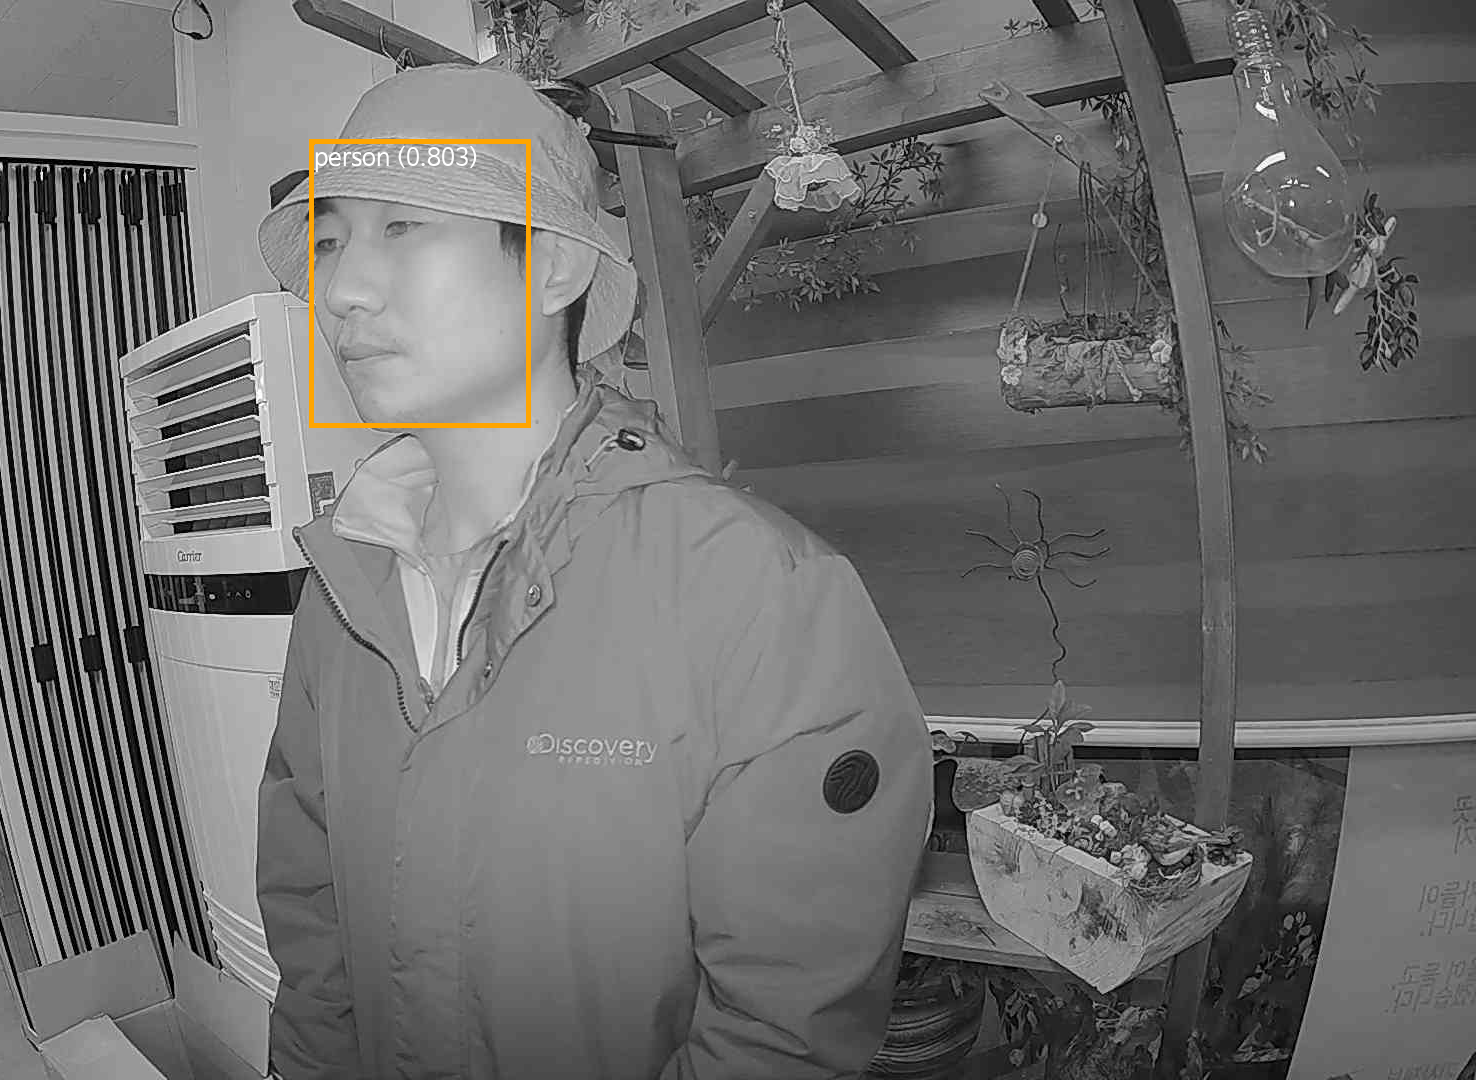

In [10]:
from PIL import Image, ImageDraw, ImageFont

def draw_boxes_on_image(image_path):
    """
    Parameters:
        image_path
    Returns:
        image: image with boxes drawn on it
    """
    image = Image.open(image_path)
    image = image.convert("RGB")
    # Run the inference and retrieve the boxes
    results = face_detection_model(image)
    predictions = results[0].boxes.data.tolist()

    label_names = ["person"] # Change if needed
    colors = ["orange"] # Change if needed

    draw = ImageDraw.Draw(image)
    font_path = "/mnt/c/Users/User/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothic.ttf" # Change if needed
    font = ImageFont.truetype(font=font_path, size=24)

    for prediction in predictions:
        x1, y1, x2, y2, confidence, label = prediction
        label = int(label)
        # Draw the box
        draw.rectangle([(x1, y1), (x2, y2)], outline=colors[label], width=5)

        # Draw the text with the label name and confidence
        text = f"{label_names[label]} ({confidence:.3f})"
        # text_width, text_height = font.getsize(text)
        text_x = x1 + 5
        text_y = y1 + 5
        # draw.rectangle([(text_x, text_y), (text_x + text_width, text_y + text_height)], fill=colors[label])
        draw.rectangle([(text_x, text_y), (text_x, text_y)], fill=colors[label])

        draw.text((text_x, text_y), text, font=font, fill=(255, 255, 255))

    return image

image_with_boxes = draw_boxes_on_image("/mnt/d/Data/119.IR 실제 환경 안면 검출 및 인식 데이터/데이터/test/3009_indoor_hat_distance1_00000473.png")
image_with_boxes.show()


0: 480x640 1 face, 24.9ms
Speed: 2.0ms preprocess, 24.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
image save complete


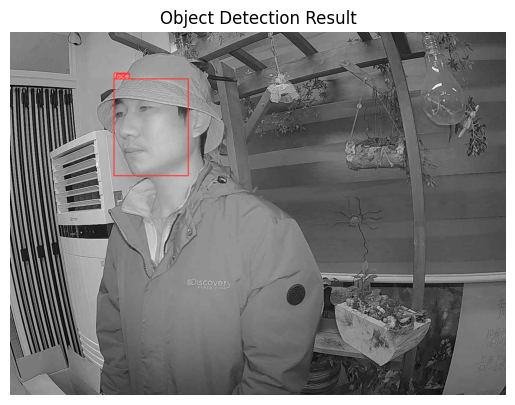

In [11]:
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image


model = YOLO("./yolov8n-face.pt")
names = model.names

folder_path = "/mnt/d/Data/119.IR 실제 환경 안면 검출 및 인식 데이터/데이터/test"
#folder_list = os.listdir(folder_path)

#for file_name in os.listdir(folder_path):
    # 이미지 파일 경로
image_path = "/mnt/d/Data/119.IR 실제 환경 안면 검출 및 인식 데이터/데이터/test/3009_indoor_hat_distance1_00000473.png"
# image_path = os.path.join(folder_path, file_name)/
assert os.path.exists(image_path), "Error: Image file not found"

# 이미지 로드
im0 = cv2.imread(image_path)
assert im0 is not None, "Error: Failed to load image"

# 결과 예측
results = model.predict(im0, show=False, batch=8)
boxes = results[0].boxes.xyxy.cpu().tolist()
clss = results[0].boxes.cls.cpu().tolist()
annotator = Annotator(im0, line_width=2, example=names)

# 객체 탐지 및 크롭
idx = 0
if boxes is not None:
    for box, cls in zip(boxes, clss):
        idx += 1
        annotator.box_label(box, color=colors(int(cls), True), label=names[int(cls)])

        crop_obj = im0[int(box[1]):int(box[3]), int(box[0]):int(box[2])]

        cv2.imwrite(os.path.join("crop_test/", file_name), crop_obj)
        print("image save complete")
        # pil_img = Image.fromarray(cv2.cvtColor(crop_obj, cv2.COLOR_BGR2RGB))
        # pil_img.save(os.path.join("crop_test/", str(idx) + ".png"))

# 결과 이미지 표시
plt.imshow(cv2.cvtColor(im0, cv2.COLOR_BGR2RGB))
plt.title('Object Detection Result')
plt.axis('off')  # 축 숨기기
plt.show()


In [2]:
import numpy as np

def retrieve_documents_from_image(image_path):
    results = model(image_path)
    predictions = results[0].boxes.data.tolist()
    
    im = Image.open(image_path)
    im = np.array(im)
    
    docs = []
    
    for prediction in predictions:
        pred_class = int(prediction[-1])
        x1, y1, x2, y2 = prediction[:4]
        docs.append((im[int(y1):int(y2), int(x1):int(x2)], pred_class))
        
    return docs